# 0. Instalando e importando as bibliotecas necessárias

In [2]:
!pip install pandas scikit-learn camelot-py joblib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import camelot

from pandas import read_csv,concat,to_datetime,DataFrame
import numpy

from matplotlib import pyplot
from seaborn import countplot,barplot,heatmap

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict,train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import joblib

path0 = '/content/drive/MyDrive/projeto-integrador-4/app/versao-1/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Tansformando os pdfs em csv

## 1.1 Carregando os PDF's - Primeira Análise

### 1.1.1 Listagem de Matrículas Ativas

In [4]:
path= path0+'matriculas-ativas.pdf'

stream = camelot.read_pdf(path,pages='all',flavor='stream')

In [5]:
stream[0].df.head(10).drop(1,axis=1) # Primeira Página - Primeitos 10 registros
# Coluna Nome Deletada

,0,2,3,4,5,6
0,Listagem de Matrículas,,,,,
1,Academia Top Fit,,,,,
2,Código,Plano,Início,Fim,Situação,Valor Mensal
3,319,Musculação,06/12/2022,,Ativa,"100,00"
4,117,Pacote 6 Meses,19/01/2023,,Ativa,"100,00"
5,296,Familiar,04/02/2023,,Ativa,"110,00"
6,297,Familiar,04/02/2023,,Ativa,"110,00"
7,273,Fisioterapia,16/02/2023,,Ativa,"0,00"
8,273,Fisioterapia,10/03/2023,,Ativa,"0,00"
9,597,Musculação,14/02/2023,,Ativa,"0,00"


In [6]:
stream[-2].df.head().drop(1,axis=1) # Penúltima Pagina - Primeiros Registros

,0,2,3,4,5,6
0,Código,Plano,Início,Fim,Situação,Valor Mensal
1,2285,Projeto Vôlei,26/08/2025,,Ativa,"100,00"
2,2287,Musculação,25/08/2025,,Ativa,"120,00"
3,2288,Musculação,25/08/2025,,Ativa,"120,00"
4,2294,Musculação,25/08/2025,,Ativa,"120,00"


In [7]:
stream[-2].df.tail().drop(1,axis=1) # Penúltima Pagina - Ultimos Registros

,0,2,3,4,5,6
30,2349,Familiar,09/09/2025,,Ativa,"110,00"
31,2350,Familiar,09/09/2025,,Ativa,"110,00"
32,2351,Projeto Vôlei,09/09/2025,,Ativa,"100,00"
33,2353,Musculação,10/09/2025,,Ativa,"120,00"
34,2356,Musculação,11/09/2025,,Ativa,"120,00"


In [8]:
stream[-1].df.drop(1,axis=1) # Ultima Pagina

,0,2,3,4,5,6
0,Código,Plano,Início,Fim,Situação,Valor Mensal
1,2358,Familiar,12/09/2025,,Ativa,"110,00"
2,2359,Musculação 3x semana,12/09/2025,,Ativa,"110,00"
3,2360,Musculação 3x semana,12/09/2025,,Ativa,"110,00"
4,,,,,,"33.875,00"


### 1.1.2 Listagem de Matrículas Canceladas

In [9]:
path= path0+'matriculas-canceladas.pdf'

stream = camelot.read_pdf(path,pages='all',flavor='stream')

In [10]:
stream[0].df.head(10).drop(1,axis=1)

,0,2,3,4,5,6
0,Listagem de Matrículas,,,,,
1,Academia Top Fit,,,,,
2,Código,Plano,Início,Fim,Situação,Valor Mensal
3,102,Musculação,12/11/2022,,Cancelada,"100,00"
4,103,Musculação,16/11/2022,,Cancelada,"100,00"
5,104,Musculação,16/11/2022,,Cancelada,"90,00"
6,105,Musculação,19/11/2022,,Cancelada,"100,00"
7,106,Musculação,17/11/2022,,Cancelada,"100,00"
8,107,Musculação,17/11/2022,,Cancelada,"100,00"
9,108,Musculação,21/11/2022,,Cancelada,"100,00"


In [11]:
stream[0].df.tail().drop(1,axis=1)

,0,2,3,4,5,6
29,128,Familiar,21/11/2022,,Cancelada,"80,00"
30,129,Familiar,17/11/2022,,Cancelada,"90,00"
31,130,Familiar,24/11/2022,,Cancelada,"90,00"
32,131,Familiar,27/11/2022,,Cancelada,"90,00"
33,132,Musculação,22/11/2022,,Cancelada,"90,00"


In [14]:
stream[-1].df.head().drop(1,axis=1)

,0,2,3,4,5,6
0,Código,Plano,Início,Fim,Situação,Valor Mensal
1,2154,Musculação 3x semana,09/06/2025,,Cancelada,"110,00"
2,2157,Musculação,10/06/2025,,Cancelada,"120,00"
3,2159,Musculação,11/06/2025,,Cancelada,"120,00"
4,2160,Musculação,11/06/2025,,Cancelada,"120,00"


In [13]:
stream[-1].df.tail(10).drop(1,axis=1)

,0,2,3,4,5,6
13,2204,Musculação,08/07/2025,,Cancelada,"120,00"
14,2207,Musculação,14/07/2025,,Cancelada,"120,00"
15,2208,Kids,07/07/2025,,Cancelada,"95,00"
16,2210,Kids,07/07/2025,,Cancelada,"95,00"
17,2213,Musculação 3x semana,10/07/2025,,Cancelada,"110,00"
18,2227,Pilates 1x,16/07/2025,,Cancelada,"120,00"
19,2237,Pilates 1x,24/07/2025,,Cancelada,"120,00"
20,2246,Musculação,02/08/2025,,Cancelada,"120,00"
21,2303,Pacote 6 Meses,27/08/2025,,Cancelada,"100,00"
22,,,,,,"304.413,51"


## 1.2 Fazendo as alterações necessárias

### 1.2.1 Matrículas Ativas

In [15]:
path=path0+'matriculas-ativas.pdf'
dfs=[]

stream = camelot.read_pdf(path,pages='all',flavor='stream')
stream[0].df = stream[0].df.iloc[2:] # excluindo as duas primeiras linhas da primeira página
stream[-1].df = stream[-1].df.iloc[:-1] # excluindo a ultima linha da ultima página

for table in stream:
    df = table.df
    df.columns = df.iloc[0] # transformando a primeira linha (antiga terceira) em cabeçalho
    df = df.iloc[1:] # deletando a primeira linha
    dfs.append(df)

df_ativas = concat(dfs).reset_index(drop=True)


### 1.2.2 Matrículas Canceladas

In [16]:
path=path0+'matriculas-canceladas.pdf'
dfs=[]

stream = camelot.read_pdf(path,pages='all',flavor='stream')
stream[0].df = stream[0].df.iloc[2:]
stream[-1].df = stream[-1].df.iloc[:-1]

for table in stream:
    df = table.df
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    dfs.append(df)

df_canceladas = concat(dfs).reset_index(drop=True)

### 1.2.3 Concatenando os dataframes

In [17]:
df = concat([df_ativas,df_canceladas])

In [18]:
df.head().drop('Nome Completo',axis=1)

,Código,Plano,Início,Fim,Situação,Valor Mensal
0,319,Musculação,06/12/2022,,Ativa,"100,00"
1,117,Pacote 6 Meses,19/01/2023,,Ativa,"100,00"
2,296,Familiar,04/02/2023,,Ativa,"110,00"
3,297,Familiar,04/02/2023,,Ativa,"110,00"
4,273,Fisioterapia,16/02/2023,,Ativa,"0,00"


In [19]:
df.tail().drop('Nome Completo',axis=1)

,Código,Plano,Início,Fim,Situação,Valor Mensal
3107,2213,Musculação 3x semana,10/07/2025,,Cancelada,"110,00"
3108,2227,Pilates 1x,16/07/2025,,Cancelada,"120,00"
3109,2237,Pilates 1x,24/07/2025,,Cancelada,"120,00"
3110,2246,Musculação,02/08/2025,,Cancelada,"120,00"
3111,2303,Pacote 6 Meses,27/08/2025,,Cancelada,"100,00"


# 2. Análise de Dados

## 2.1 Informações Básicas

In [21]:
DataFrame({'types':df.dtypes,
                 'unique':df.nunique(), # Calculo da quantidade de valores unicos (Indica colunas categóricas)
                 'null_Values':df.isnull().sum(), # Quantidade de Valores Nulos
                 'null_values_percentage':round(100*df.isnull().sum()/len(df),0), # Percentual de valores nulos - Quando maior que 20% a coluna não serve
                 })

,types,unique,null_Values,null_values_percentage
Código,object,1718,0,0.0
Nome Completo,object,1716,0,0.0
Plano,object,21,0,0.0
Início,object,755,0,0.0
Fim,object,16,0,0.0
Situação,object,2,0,0.0
Valor Mensal,object,32,0,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3452 entries, 0 to 3111
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Código         3452 non-null   object
 1   Nome Completo  3452 non-null   object
 2   Plano          3452 non-null   object
 3   Início         3452 non-null   object
 4   Fim            3452 non-null   object
 5   Situação       3452 non-null   object
 6   Valor Mensal   3452 non-null   object
dtypes: object(7)
memory usage: 215.8+ KB


In [24]:
df.drop('Nome Completo',axis=1).describe()

,Código,Plano,Início,Fim,Situação,Valor Mensal
count,3452,3452,3452,3452,3452,3452
unique,1718,21,755,16,2,32
top,1111,Musculação,06/01/2025,,Cancelada,"100,00"
freq,16,1838,31,3433,3112,983


## 2.2. Variável Alvo

In [25]:
df['Situação'].value_counts()

,count
Situação,
Cancelada,3112
Ativa,340


In [26]:
100*df['Situação'].value_counts()/len(df) # Porcentagem das classes da variavel alvo

,count
Situação,
Cancelada,90.150637
Ativa,9.849363


([<matplotlib.patches.Wedge at 0x7939c405db50>,
 [Text(-1.0477591348121007, 0.3349638718097799, 'Cancelada'),
  Text(1.0477591640955695, -0.33496378021176226, 'Ativa')],
 [Text(-0.5715049826247821, 0.18270756644169808, '90%'),
  Text(0.5715049985975833, -0.18270751647914302, '10%')])

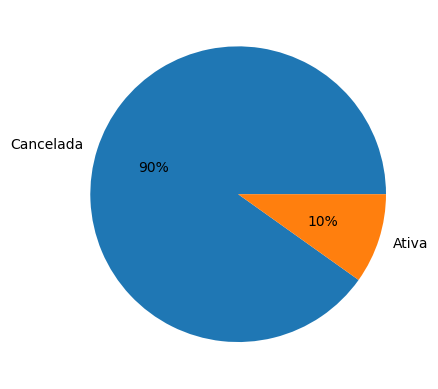

In [27]:
data = 100*df['Situação'].value_counts()/len(df)

pyplot.pie(data.values,labels=data.index,autopct='%1.f%%')

## 2.3 Variável Plano

In [28]:
df['Plano'].value_counts()

,count
Plano,
Musculação,1838
Familiar,296
Musculação 3x semana,278
Kids,271
MusculaçãoGYMPASS,127
Pacote 6 Meses,114
Pilates 2x,99
Fisioterapia,86
Pilates 1x,68


<Axes: xlabel='Plano', ylabel='count'>

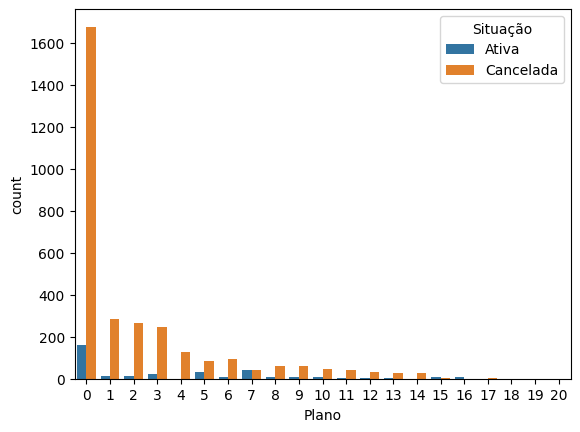

In [29]:
# Pequena função pra transformar o texto da coluna em numeros
values = df['Plano'].value_counts().index
dicio = dict(zip(values,range(len(values))))
df['Plano'] = df['Plano'].map(dicio)

countplot(data=df,x='Plano',hue='Situação')

## 2.4 Variável Valor Mensal

In [30]:
df['Valor Mensal'].value_counts()

,count
Valor Mensal,
"100,00",983
"110,00",799
"120,00",480
"90,00",347
"0,01",130
"85,00",106
"75,00",104
"0,00",99
"95,00",72


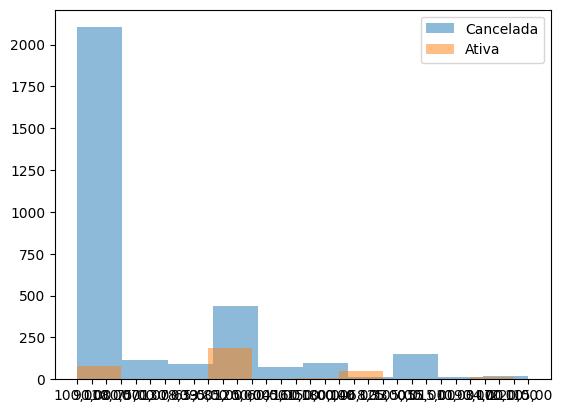

In [31]:
names = df['Situação'].value_counts().index
for name in names:
  pyplot.hist(df[df['Situação']==name]['Valor Mensal'],alpha=0.5,label=name)
pyplot.legend()

## 2.5 Variável Início

In [32]:
df['Ano'] = to_datetime(df['Início'],dayfirst=True).dt.year
df['Mes'] = to_datetime(df['Início'],dayfirst=True).dt.month
df = df.drop('Início',axis=1)

<Axes: xlabel='Ano', ylabel='count'>

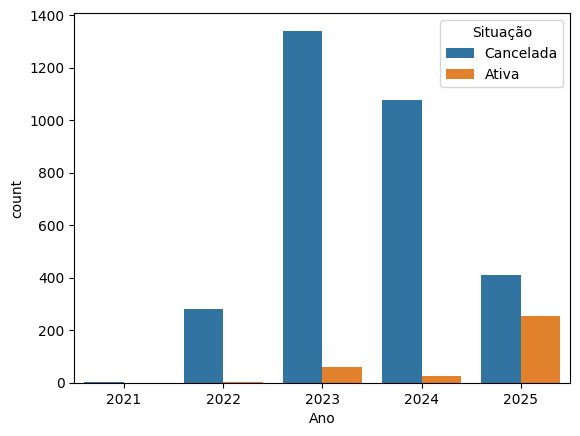

In [33]:
countplot(data=df,x='Ano',hue='Situação')

<Axes: xlabel='Mes', ylabel='count'>

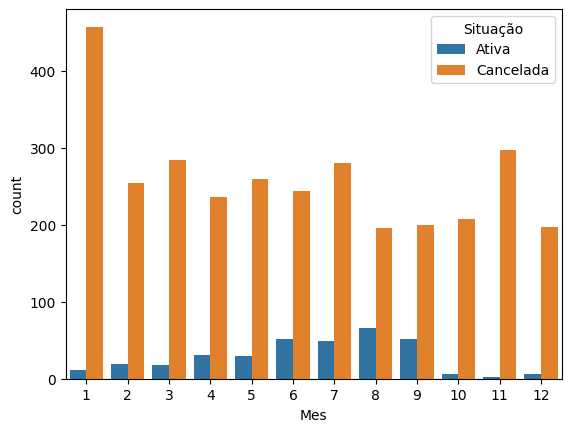

In [34]:
countplot(data=df,x='Mes',hue='Situação')

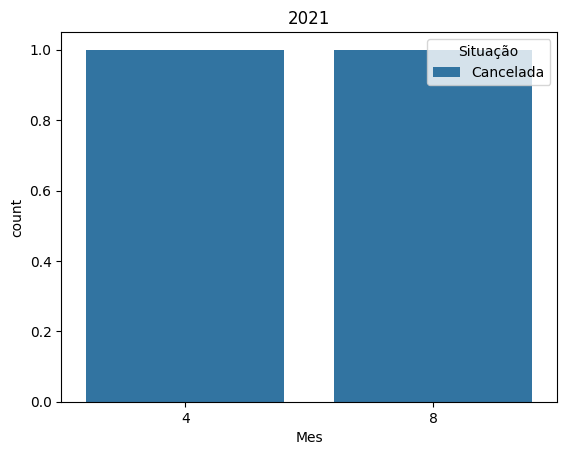

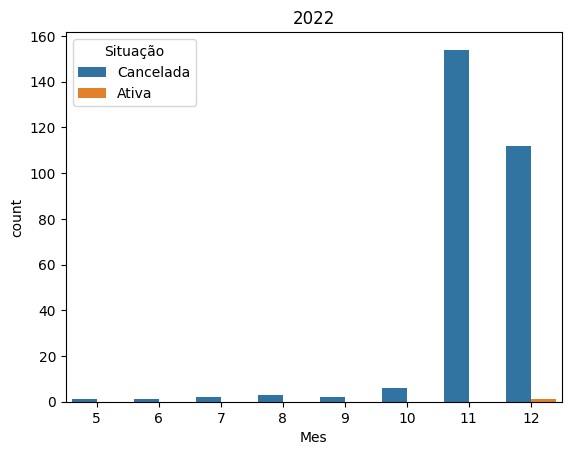

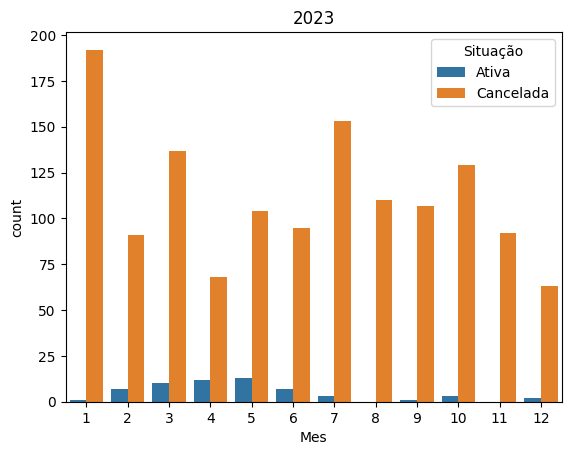

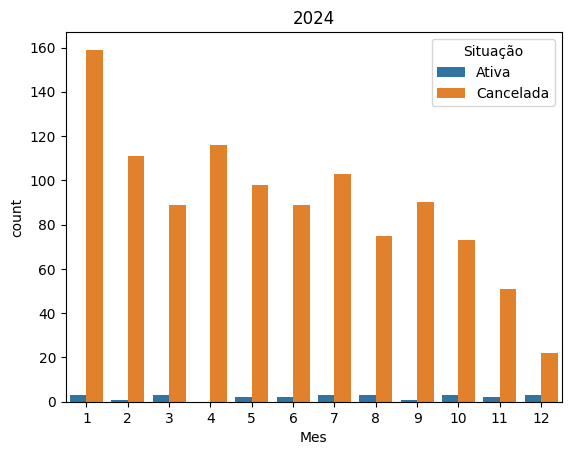

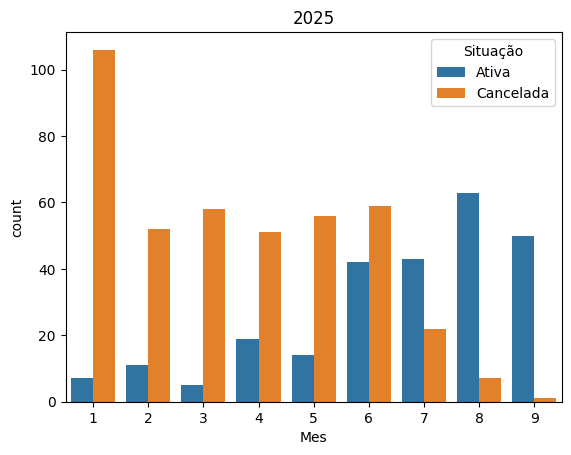

In [35]:
for year in df['Ano'].value_counts().sort_index().index:
  dff = df[df['Ano']==year]
  countplot(data=dff,x='Mes',hue='Situação')
  pyplot.title(year)
  pyplot.show()


## 2.6 Transformações Necessárias para se gerar um CSV

In [36]:
# Função que gera um arquivo CSV a partir dos PDF's
# Aqui as classes da variável alvo serão estratificadas
# Esta função irá para o modelo final
def transform():
  arquivos = ['matriculas-ativas.pdf','matriculas-canceladas.pdf']

  data=[]
  for arquivo in arquivos:
    path = path0+arquivo
    dfs=[]

    stream = camelot.read_pdf(path,pages='all',flavor='stream')
    stream[0].df = stream[0].df.iloc[2:]
    stream[-1].df = stream[-1].df.iloc[:-1]

    for table in stream:
      df = table.df
      df.columns = df.iloc[0]
      df = df.iloc[1:]
      dfs.append(df)

    df = concat(dfs).reset_index(drop=True)

    if arquivo == 'matriculas-canceladas.pdf':
      df = df.sample(n=340)

    data.append(df)

  df = concat(data).reset_index(drop=True)
  df.to_csv(path0+'data.csv',sep=';',index=False)

  return

transform()

# 3. Modelagem

## 3.1 Transformações Necessárias para carregar o dataset no modelo

In [37]:
def load_data():
  df = read_csv(path0+'data.csv',sep=';',decimal=',')

  df = df.drop(['Código','Nome Completo','Fim'], axis=1)

  values = df['Plano'].value_counts().index
  dicio = dict(zip(values,range(len(values))))
  df['Plano'] = df['Plano'].map(dicio)

  df['Situação'] = df['Situação'].map({'Ativa':0,'Cancelada':1})

  df['Mes'] = to_datetime(df['Início'],dayfirst=True).dt.month
  df = df.drop('Início',axis=1)

  df = df.fillna(-1)
  df = df.astype('float64')

  return df

## 3.2 Testando Algorítimos

In [38]:
df = load_data()
target = 'Situação'
names = ['Decision Tree',
         'KNN',
         'Naive Bayes',
         'SVM',
         'QDA',
         'Random Forest']

classifiers = [DecisionTreeClassifier(),
            KNeighborsClassifier(),
            SVC(),
            GaussianNB(),
            QuadraticDiscriminantAnalysis(),
            RandomForestClassifier()
            ]

for name,classifier in zip(names,classifiers):
    y = cross_val_predict(classifier,df.drop(target,axis=1),df[target])
    print(name,round(accuracy_score(df[target],y),2))

Decision Tree 0.82
KNN 0.76
Naive Bayes 0.67
SVM 0.46
QDA 0.47
Random Forest 0.75


## 3.3 Melhorando os hiperparâmetros do modelo

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop('Situação',axis=1),df['Situação'],test_size=0.3,shuffle=True)

parameters = {'criterion':('gini', 'entropy', 'log_loss'),'splitter':('best','random'),'min_samples_split':[2,100]}

clf = GridSearchCV(DecisionTreeClassifier(), parameters)
clf.fit(xtrain,ytrain)
DataFrame(clf.cv_results_)[['params','mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.884452,1
4,"{'criterion': 'entropy', 'min_samples_split': ...",0.882346,2
8,"{'criterion': 'log_loss', 'min_samples_split':...",0.882346,2
1,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.865526,4
9,"{'criterion': 'log_loss', 'min_samples_split':...",0.861338,5


## 3.4 Criando o modelo final de produção

In [40]:
def create_model():
  df = load_data()

  xtrain = df.drop('Situação',axis=1)
  ytrain = df['Situação']

  model = DecisionTreeClassifier()
  model.fit(xtrain,ytrain)

  joblib.dump(model,path0+'model.pkl.z')

  return
create_model()

In [41]:
def predict_new_input(plano,valor_mensal,mes):
  model = joblib.load(path0+'model.pkl.z')
  input = DataFrame({'Plano':[plano],'Valor Mensal':[valor_mensal],'Mes':[mes]})
  yproba = model.predict_proba(input)

  return yproba
predict_new_input(3,123,3)

array([[0.83333333, 0.16666667]])